# AIRDOS HIMAC Clibration (256 ch. version)

# Spectrum Interactive

In [1]:
%pylab inline --no-import-all
%matplotlib qt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt
import matplotlib

fto = './data/DATALOG.TXT' #  File to Open
l=[]
l.extend(range(0,520))
df = pd.read_table(fto, sep=',', header=None, names=l, comment='*',engine='python')

#
''' DEBUG
df = df.reset_index(drop=True)
df.drop(df[df.index > 100].index, inplace=True)
'''#'''

df.drop(df[df[0]=='$GPTXT'].index, inplace=True)
#df.drop(r[r[0]=='$GPRMC'].index, inplace=True)
df.drop(df[df[0]=='$GPVTG'].index, inplace=True)
df.drop(df[df[0]=='$GPGLL'].index, inplace=True)
df.drop(df[df[0]=='$GPGSA'].index, inplace=True)
df.drop(df[df[0]=='$GPGSV'].index, inplace=True)
#df.drop(df[df[0]=='$CANDY'].index, inplace=True)


matplotlib.rcParams.update({'font.size': 20})

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc[range(270,513)].sum(axis=1)

plt.figure(figsize=(20,5))
plt.yscale('log')

rc.ix[:,'sum'].plot(c='black')

plt.title('Select 10 points.')
plt.xlabel('Measurement No.')
plt.ylabel('Flux [counts per 10 s]')

#----------- Select Measurements in Flux diagram -----------------------------
points=plt.ginput(10)

e1 = [points[0][0],points[1][0]]
e2 = [points[2][0],points[3][0]]
e3 = [points[4][0],points[5][0]]
e4 = [points[6][0],points[7][0]]
e5 = [points[8][0],points[9][0]]

rc.ix[e1[0]:e1[1],'sum'].plot(c='blue')
rc.ix[e2[0]:e2[1],'sum'].plot(c='orange')
rc.ix[e3[0]:e3[1],'sum'].plot(c='green')
rc.ix[e4[0]:e4[1],'sum'].plot(c='red')
rc.ix[e5[0]:e5[1],'sum'].plot(c='purple')

plt.title('AIRDOS')
plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')

#----------- Plot Spectrum -----------------------------
LOW_ENERGY = 256

ener1 = rc.ix[e1[0]:e1[1],LOW_ENERGY:513].sum()
ener2 = rc.ix[e2[0]:e2[1],LOW_ENERGY:513].sum()
ener3 = rc.ix[e3[0]:e3[1],LOW_ENERGY:513].sum()
ener4 = rc.ix[e4[0]:e4[1],LOW_ENERGY:513].sum()
ener5 = rc.ix[e5[0]:e5[1],LOW_ENERGY:513].sum()
 
plt.figure(figsize=(15,10))
plt.yscale('log')

plt.plot(ener1, label='e1', drawstyle='steps-pre', c='blue')
plt.plot(ener2, label='e2', drawstyle='steps-pre', c='orange')
plt.plot(ener3, label='e3', drawstyle='steps-pre', c='green')
plt.plot(ener4, label='e4', drawstyle='steps-pre', c='red')
plt.plot(ener5, label='e5', drawstyle='steps-pre', c='purple')
#plt.ylim([0,20000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS Spectrum')
plt.xlabel('Channel')
plt.ylabel('Counts')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


## Save Histogram Data

In [2]:
ener1.to_csv('e1.csv')
ener2.to_csv('e2.csv')
ener3.to_csv('e3.csv')
ener4.to_csv('e4.csv')
ener5.to_csv('e5.csv')

Populating the interactive namespace from numpy and matplotlib


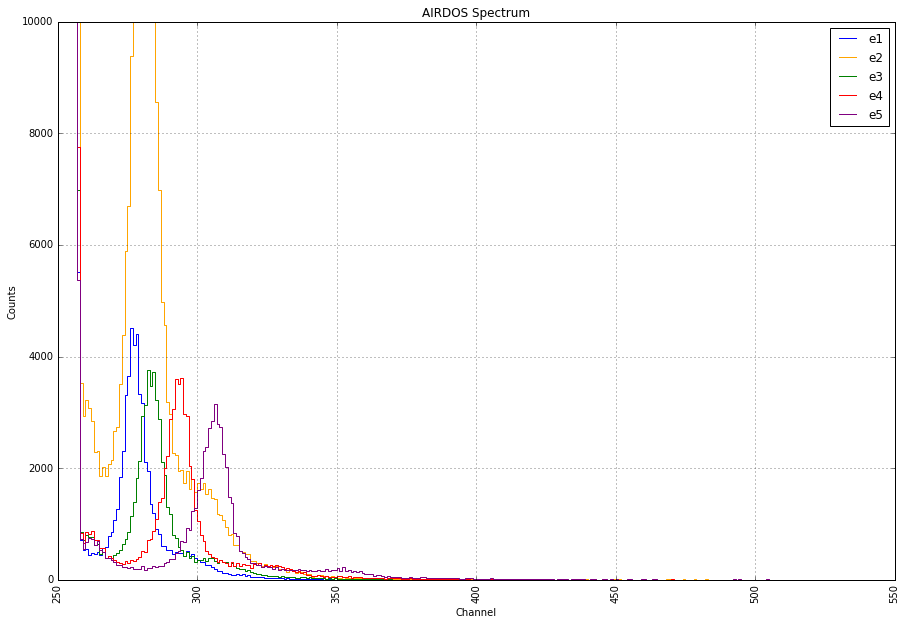

In [11]:
%pylab inline --no-import-all
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import matplotlib.pyplot as plt

ener1 = pd.read_table('e1.csv', sep=',', header=None, comment='*',engine='python')
ener2 = pd.read_table('e2.csv', sep=',', header=None, comment='*',engine='python')
ener3 = pd.read_table('e3.csv', sep=',', header=None, comment='*',engine='python')
ener4 = pd.read_table('e4.csv', sep=',', header=None, comment='*',engine='python')
ener5 = pd.read_table('e5.csv', sep=',', header=None, comment='*',engine='python')

plt.figure(figsize=(15,10))
#plt.yscale('log')

#ener1.plot( label='e1')
plt.plot(ener1[0],ener1[1], label='e1', drawstyle='steps-pre', c='blue')
plt.plot(ener2[0],ener2[1], label='e2', drawstyle='steps-pre', c='orange')
plt.plot(ener3[0],ener3[1], label='e3', drawstyle='steps-pre', c='green')
plt.plot(ener4[0],ener4[1], label='e4', drawstyle='steps-pre', c='red')
plt.plot(ener5[0],ener5[1], label='e5', drawstyle='steps-pre', c='purple')

plt.ylim([0,10000])
#plt.xlim([600,750])
plt.legend()
plt.title('AIRDOS Spectrum')
plt.xlabel('Channel')
plt.ylabel('Counts')
#plt.xticks(range(500,1030,10))
plt.xticks(rotation=90)
plt.grid()